<a href="https://colab.research.google.com/github/EvgSkv/logica/blob/main/examples/more/Table_Pivot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pivot with Logica

[evgskv@](https://github/evgskv)


Pivot is an operation that takes a table and creates a new one
[changing rows to columns](https://towardsdatascience.com/pivot-in-bigquery-4eefde28b3be).

BigQuery has `PIVOT` operator for this, but  Logica does not have a syntax for
it at the moment. Thus pivot would have to be done in Python, or
with some bolierplate in your rule. We illustrate both methods below.

## Installing Logica

In [23]:
!pip install logica


In [24]:
from logica import colab_logica

## Pivot with Pandas

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at AirlineStats_sql variable.
SELECT
  bigquerysamples_airline_ontime_data_flights.airline AS airline,
  bigquerysamples_airline_ontime_data_flights.departure_airport AS departure_airport,
  AVG(bigquerysamples_airline_ontime_data_flights.departure_delay) AS departure_delay
FROM
  `bigquery-samples.airline_ontime_data.flights` AS bigquerysamples_airline_ontime_data_flights
GROUP BY airline, departure_airport;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

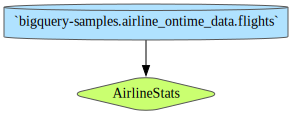

Running predicate: AirlineStats


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at AirlineStats variable.


,airline,departure_airport,departure_delay
0,OO,ATL,13.730230
1,YV,IAD,16.920243
2,DH,IAD,9.526582
3,OO,IAD,9.882473
4,YV,CLT,9.875762
...,...,...,...
2568,EV,DRT,2.809836
2569,XE,ABI,-4.604167
2570,XE,ILE,3.106936
2571,VX,DCA,23.504587


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
%%logica AirlineStats

Flight(..r) :- `bigquery-samples.airline_ontime_data.flights`(..r);

# Example 1: Aggregated delay stats.
AirlineStats(airline:,
             departure_airport:,
             departure_delay? Avg= departure_delay) distinct :-
  Flight(airline:, departure_airport:, departure_delay:);

In [26]:
AirlineStats.pivot(index="departure_airport", columns="airline",
                   values="departure_delay")


airline,9E,AA,AS,B6,CO,DH,DL,EV,F9,FL,HA,HP,KH,MQ,NW,OH,OO,TZ,UA,US,VX,WN,XE,YV
departure_airport,,,,,,,,,,,,,,,,,,,,,,,,
ABE,5.815721,NaN,NaN,NaN,NaN,5.356243,15.348315,13.209092,1.746667,0.714016,NaN,NaN,NaN,6.634418,0.780806,6.537475,10.406807,NaN,NaN,-0.876491,NaN,NaN,0.310074,17.269643
ABI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.750000,NaN,NaN,NaN,NaN,NaN,4.157622,NaN,NaN,6.579890,NaN,NaN,0.000000,NaN,NaN,-4.604167,NaN
ABQ,NaN,5.024531,NaN,NaN,1.537971,NaN,4.369859,11.727557,1.297937,NaN,NaN,3.098526,NaN,10.124195,3.563547,NaN,4.087710,-11.0,3.782195,0.036098,NaN,8.851859,3.910117,-1.178958
ABR,52.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.119545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.451006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRG,NaN,NaN,5.559596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.543103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XNA,5.471935,8.300445,NaN,NaN,5.500000,4.879781,1.833333,11.111201,NaN,NaN,NaN,NaN,NaN,11.136056,2.892894,4.795364,7.478064,NaN,NaN,NaN,NaN,NaN,9.322239,11.571429


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at AirlineStatsZero_sql variable.
WITH t_1_AirlineStats AS (SELECT
  bigquerysamples_airline_ontime_data_flights.airline AS airline,
  bigquerysamples_airline_ontime_data_flights.departure_airport AS departure_airport,
  AVG(bigquerysamples_airline_ontime_data_flights.departure_delay) AS departure_delay
FROM
  `bigquery-samples.airline_ontime_data.flights` AS bigquerysamples_airline_ontime_data_flights
GROUP BY airline, departure_airport),
t_2_Airline AS (SELECT
  t_4_bigquerysamples_airline_ontime_data_flights.airline AS col0
FROM
  `bigquery-samples.airline_ontime_data.flights` AS t_4_bigquerysamples_airline_ontime_data_flights
GROUP BY col0),
t_5_Airport AS (SELECT
  t_7_bigquerysamples_airline_ontime_data_flights.departure_airport AS col0
FROM
  `bigquery-samples.airline_ontime_data.flights` AS t_7_bigquerysamples_airline_ontime_data_flights
GROUP BY col0),
t_0_AirlineStatsZero_MultBodyAggAux AS (SELECT * FROM (
  
    SELECT
      AirlineStats.airline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

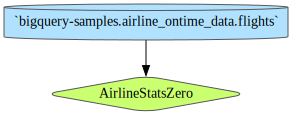

Running predicate: AirlineStatsZero


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at AirlineStatsZero variable.


,airline,departure_airport,departure_delay
0,DH,IAD,9.526582
1,9E,MSP,6.385074
2,9E,ATL,9.165483
3,F9,DEN,8.538637
4,AA,SLC,5.889437
...,...,...,...
8323,WN,APN,0.000000
8324,EV,BFL,0.000000
8325,EV,BRD,0.000000
8326,EV,DLG,0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
%%logica AirlineStatsZero

Flight(..r) :- `bigquery-samples.airline_ontime_data.flights`(..r);

AirlineStats(airline:,
             departure_airport:,
             departure_delay? Avg= departure_delay) distinct :-
  Flight(airline:, departure_airport:, departure_delay:);

# Example 2: Aggregated delay stats with 0 if there were no flights.
Airline(airline) distinct :- Flight(airline:);
Airport(airport) distinct :- Flight(departure_airport: airport);

AirlineStatsZero(airline:, departure_airport:,
                 departure_delay? += departure_delay) distinct :-
  AirlineStats(airline:, departure_airport:, departure_delay:);
AirlineStatsZero(airline:, departure_airport:,
                 departure_delay? += 0) distinct :-
  Airline(airline), Airport(departure_airport);  


In [33]:
AirlineStatsZero.pivot(index="departure_airport", columns="airline",
                       values="departure_delay")

airline,9E,AA,AS,B6,CO,DH,DL,EV,F9,FL,HA,HP,KH,MQ,NW,OH,OO,TZ,UA,US,VX,WN,XE,YV
departure_airport,,,,,,,,,,,,,,,,,,,,,,,,
ABE,5.815721,0.000000,0.000000,0.0,0.000000,5.356243,15.348315,13.209092,1.746667,0.714016,0.0,0.000000,0.0,6.634418,0.780806,6.537475,10.406807,0.0,0.000000,-0.876491,0.0,0.000000,0.310074,17.269643
ABI,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.750000,0.000000,0.000000,0.0,0.000000,0.0,4.157622,0.000000,0.000000,6.579890,0.0,0.000000,0.000000,0.0,0.000000,-4.604167,0.000000
ABQ,0.000000,5.024531,0.000000,0.0,1.537971,0.000000,4.369859,11.727557,1.297937,0.000000,0.0,3.098526,0.0,10.124195,3.563547,0.000000,4.087710,-11.0,3.782195,0.036098,0.0,8.851859,3.910117,-1.178958
ABR,52.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-0.119545,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
ABY,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,9.451006,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,18.727273,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRG,0.000000,0.000000,5.559596,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
WYS,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-2.543103,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
XNA,5.471935,8.300445,0.000000,0.0,5.500000,4.879781,1.833333,11.111201,0.000000,0.000000,0.0,0.000000,0.0,11.136056,2.892894,4.795364,7.478064,0.0,0.000000,0.000000,0.0,0.000000,9.322239,11.571429


## Manually defining pivot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at AirlineStatsPivot_sql variable.
WITH t_3_AirlineStats AS (SELECT
  bigquerysamples_airline_ontime_data_flights.airline AS airline,
  bigquerysamples_airline_ontime_data_flights.departure_airport AS departure_airport,
  AVG(bigquerysamples_airline_ontime_data_flights.departure_delay) AS departure_delay
FROM
  `bigquery-samples.airline_ontime_data.flights` AS bigquerysamples_airline_ontime_data_flights
GROUP BY airline, departure_airport),
t_9_Airport AS (SELECT
  t_11_bigquerysamples_airline_ontime_data_flights.departure_airport AS col0
FROM
  `bigquery-samples.airline_ontime_data.flights` AS t_11_bigquerysamples_airline_ontime_data_flights
GROUP BY col0)
SELECT
  Airport.col0 AS departure_airport,
  (SELECT
  ANY_VALUE(AirlineStats.departure_delay) AS logica_value
FROM
  t_3_AirlineStats AS AirlineStats
WHERE
  (AirlineStats.airline = "AA") AND
  (AirlineStats.departure_airport = Airport.col0)) AS aa,
  (SELECT
  ANY_VALUE(t_4_AirlineStats.departure_del

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

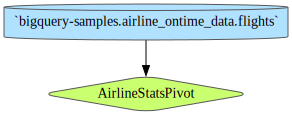

Running predicate: AirlineStatsPivot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at AirlineStatsPivot variable.


,departure_airport,aa,ha,fl,ua
0,HNL,5.651569,-0.049908,NaN,4.806615
1,OGG,8.191822,-1.569958,NaN,5.149040
2,LAX,8.399067,7.057573,4.749813,7.852697
3,LIH,8.169068,-2.517563,NaN,3.607785
4,CVG,3.470924,NaN,NaN,6.588211
...,...,...,...,...,...
342,IMT,NaN,NaN,NaN,NaN
343,ALO,NaN,NaN,NaN,NaN
344,RHI,NaN,NaN,NaN,NaN
345,MWH,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
%%logica AirlineStatsPivot

Flight(..r) :- `bigquery-samples.airline_ontime_data.flights`(..r);
AirlineStats(airline:,
             departure_airport:,
             departure_delay? Avg= departure_delay) distinct :-
  Flight(airline:, departure_airport:, departure_delay:);

Airline(airline) distinct :- Flight(airline:);
Airport(airport) distinct :- Flight(departure_airport: airport);

GetDepartureDelay(departure_airport:, airline:) = d :-
  d AnyValue= (
    departure_delay :-
    AirlineStats(airline:, departure_airport:, departure_delay:));

AirlineStatsPivot(departure_airport:, aa:, ha:, fl:, ua:) :-
  Airport(departure_airport),
  aa == GetDepartureDelay(departure_airport:, airline: "AA"),
  ha == GetDepartureDelay(departure_airport:, airline: "HA"),
  fl == GetDepartureDelay(departure_airport:, airline: "FL"),
  ua == GetDepartureDelay(departure_airport:, airline: "UA");
